# Getting Things Done with Python
## Python for analysis, processing, and visualisation of (Big) Data





-------------
### Why does it matter?

  * Python is one of the most used languages:![](langpop.png)


  * Many Python jobs are well paid as they are about analysing data (data science)
    > Think about computer science years ago. The internet was becoming a thing and people were making a lot of money on it. Everybody wanted to become a programmer, a web-designer or anything, just to be in the CS industry. Salaries were super high and it was exceptional to be there. As time passed by, the salaries got lower as the supply of CS guys (and girls) started to catch up with the demand. That said, the industry is still above average in terms of pay.
    > 
    > The same thing is happening to the data science industry right now. Demand is really high and supply is really low, so the salaries are still very high and people are very much willing to get into data science.
Forbes describes the data science field as one that has high demand, but low supply. Data science technology has advanced and includes powerful analysis tools like Python! Check out some examples of big companies using data 
science and why you are needed! 
    > https://www.forbes.com/sites/quora/2017/10/25/why-data-science-is-such-a-hot-career-right-now/#4d9106fd106b
  * There are quite many jobs out there involving development with Python: https://stackoverflow.com/jobs/developer-jobs-using-python
  
  * You will get another tool on your professional toolbelt for your further professional and educational careers, which enables you to:
    - Quickly answering questions, i.e., data science.
    - Build protoypes and glue systems effectively and efficiently.
    - Become a Mrs./[Mr. Fixit](https://www.youtube.com/watch?v=tC5RRUTHp_U)!
![](https://images.duckduckgo.com/iu/?u=https%3A%2F%2Fheavenlyjava.files.wordpress.com%2F2015%2F06%2Fimg_0665-1.png&f=1)


-----------------



### What will you get?

  * You will learn Python and get a whirlwind tour through the language, the standard library, and many of the most common libraries.
  * You will work with data or datasets that are larger then what you are used to and that will challange you and your computer.
  * Hopefully a lot of **fun**.
  
-----------------

### What will we learn and use?
  
  * Python programming basic, functions, control structures, OO development, bit of functional programming, and the advantages/diadvantages of dynamic languages
  * *Numpy* & *Pandas* for data representation and processing
  * *Matplotlib* and *Bokeh* for visualization
  * *IPython* for documentation and collaboration
  * *Jupyter Notebooks* for coding and communication
  * Webscraping amongst others with *Beautifulsoup* and *Selenium*
  * Parallelizing your program via OS processes *Multiprocessing* and via *GNU Parallel*
  * Image processing with *OpenCV*
  * A bit of *Flask*
  * Regular Expressions
  * Building CLI applications with *docopt*
  * Perhaps NLP with *NLTK*
  * ... and many more!
  
  
  
-----------------

### The course is inspired by and based on the following books 

  * [Python Crash Course](https://www.nostarch.com/pythoncrashcourse)
    ![](https://www.safaribooksonline.com/library/cover/9781457197185/360h/)  
  * [Automate the Boring Stuff with Python](https://automatetheboringstuff.com)
    ![](https://automatetheboringstuff.com/images/automate_cover_medium.png)
  * [Data Science from Scratch](http://shop.oreilly.com/product/0636920033400.do)
    ![](https://covers.oreillystatic.com/images/0636920033400/cat.gif)  



---------------------------

# Okay, but what will we really do?

## For example, analyzing CO2 emissions...

We will learn to write and understand programs such as in the following, which download, process and visualize data, so that we can better understand the world we are living in.

Here we see that Uruguay eventhough it has a similar amount of inhabitants as Denmark emits only a third of the amount of CO2.

<IPython.core.display.Javascript object>


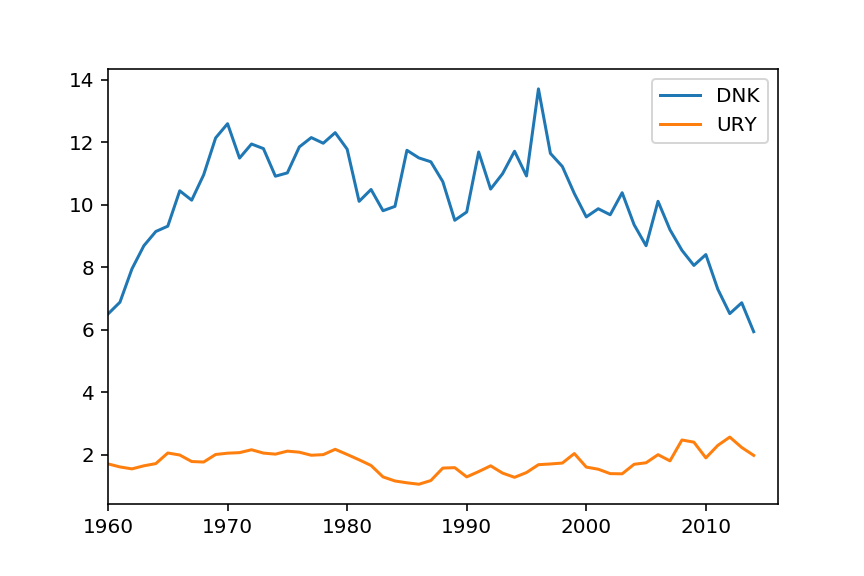

In [7]:
%matplotlib notebook

import zipfile
import requests
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob


def get_data():
    local_files = glob('./API_Download*.csv')
    if not local_files:
        url = 'http://api.worldbank.org/v2/en/country/DNK;URY'
        response = requests.get(url, params={'downloadformat': 'csv'})
        fname = response.headers['Content-Disposition'].split('=')[1]

        if response.ok:  # status_code == 200:
            with open(fname, 'wb') as f:
                f.write(response.content)   

        print('Downloaded {}'.format(fname))

        zipfile.ZipFile(fname, 'r').extractall('.')
        local_file = glob('./API_Download*.csv')
    else:
        local_file = local_files[0]
    return local_file


def fixing_header(local_file):
    cmd = 'sed 5!d {}'.format(local_file).split()
    out, err = subprocess.Popen(cmd, stdout=subprocess.PIPE, 
                                stderr=subprocess.STDOUT).communicate()
    # Since we are getting the output as a byte literal, we have to decode it into string
    header_cols = out.splitlines()[0].decode('UTF-8').split(',')
    header_cols = [h.replace('"', '') for h in header_cols]
    return header_cols


def get_emissions(local_file):
    cmd = ['grep', 'CO2 emissions (metric tons per capita)', local_file]
    out, err = subprocess.Popen(cmd, stdout=subprocess.PIPE, 
                                stderr=subprocess.STDOUT).communicate()
    lines = out.decode('UTF-8').splitlines()
    lines = [l.split(',') for l in lines]
    lines = [[c.replace('"', '') for c in l] for l in lines]
    return lines


csv_file = get_data()
header_cols = fixing_header(csv_file)
lines = get_emissions(csv_file)

ts_dk = pd.Series(lines[0][4:-1], index=np.asarray(header_cols[4:-1], dtype=int))
ts_dk = pd.to_numeric(ts_dk)

ts_ur = pd.Series(lines[1][4:-1], index=np.asarray(header_cols[4:-1], dtype=int))
ts_ur = pd.to_numeric(ts_ur)
ts = pd.concat([ts_dk, ts_ur], axis=1, keys=['DNK', 'URY'])
ts.plot()

## For example, perceptron learning...

We will see how a small thing like that: 
![](https://appliedgo.net/media/perceptron/neuron.png)

which is encoded as in the following:

In [7]:
import numpy as np


def activation_function(x):
    if x < 0:
        return -1
    else:
        return 1
    

def perceptron(inp, weights):
    dot_product = sum([i * w for i, w in zip(inp, weights)])
    output = activation_function(dot_product)
    return output

allows a computer to say if an iris flower is an iris setosa or not.

We will apply this knowledge to understand how machine learning works.

![](Iris_setosa_or_not.png)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/440px-Kosaciec_szczecinkowaty_Iris_setosa.jpg)

## For example, movement detection...

![](movement.gif)
![](movement_fd.gif)

where we will see what role the following two functions play in that.

In [ ]:
def process_frame(frame, amp):
    global first_frame

    # convert the frame to grayscale, and blur it
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (21, 21), 0)

    # if the first frame is None, initialize it
    if first_frame is None:
        first_frame = gray

    # compute the absolute difference between the current frame and
    # first frame
    frame_delta = cv2.absdiff(first_frame, gray) * amp
    thresh = cv2.threshold(frame_delta, 40, 255, cv2.THRESH_BINARY)[1]
 
    # dilate the thresholded image to fill in holes, then find contours
    # on thresholded image
    thresh = cv2.dilate(thresh, None, iterations=2)

    return thresh, frame_delta


def find_contours(frame, thresh, area):
    global text
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, 
                            cv2.CHAIN_APPROX_SIMPLE)[-2]
    # loop over the contours
    for c in cnts:
        # if the contour is too small, ignore it
        if cv2.contourArea(c) >= area:
 
            # compute the bounding box for the contour, draw it on the frame,
            # and update the text
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            text = 'Something is moving!'